# Effective Reproduction Number vs Policy (Korea)

TODOs
- Show all policies in plot (need a live filter)

Please direct your questions to [Bin Zhang](https://www.linkedin.com/in/binzhangmd)

Please run `Effective Reproduction Number.ipynb` to calculate effective reproduction number data.

In [1]:
# Mount for Colab (Optional)
COLAB = False

if COLAB:
    from google.colab import drive
    drive.mount('/content/drive')

    DATASET_BASE = '/content/drive/My Drive/CovidApps/datasets/'
else:
    DATASET_BASE = '../datasets/'

DS4C_PATH = DATASET_BASE + 'coronavirusdataset/'
POLICY_PATH = DS4C_PATH + 'Policy.csv'

RESULTS_PATH = 'rt_World.csv'

In [2]:
import os
import requests
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from matplotlib import ticker

from datetime import date
from datetime import datetime

from IPython.display import clear_output

%config InlineBackend.figure_format = 'retina'

### Read Effective Reproduction Numbers


In [3]:
results = pd.read_csv(RESULTS_PATH,
                     parse_dates=['date'],
                     index_col=['region', 'date']).sort_index()

### Read Policy Measures


In [4]:
korea_measures = pd.read_csv(POLICY_PATH,
                     parse_dates=['start_date', 'end_date'],
                     index_col=['start_date']).sort_index()

### Render Charts

In [5]:
def plot_rt(name, result, ax, c=(.3,.3,.3,1), ci=(0,0,0,.05)):
    ax.set_ylim(0, 2.5)
    ax.set_title(name)
    ax.plot(result['median'],
            marker='o',
            markersize=4,
            markerfacecolor='w',
            lw=1,
            c=c,
            markevery=2)
    ax.fill_between(
        result.index,
        result['lower_90'].values,
        result['upper_90'].values,
        color=ci,
        lw=0)
    ax.axhline(1.0, linestyle=':', lw=1)

    # measures = korea_measures[(korea_measures['type'] == 'Health') | (korea_measures['type'] == 'Education')]
    measures = korea_measures[(korea_measures['type'] != 'Alert') & (korea_measures['type'] != 'Immigration') & (korea_measures['type'] != 'Health') & (korea_measures['type'] != 'Education')]
    measures = measures.loc[(measures.index >= result.index[0]) & (measures.index <= result.index[-1])]
    label = ''
    # row_iterator = measures.iterrows()
    # for index, row in row_iterator:
    #   print(row)
    #   print(next(row_iterator))
    for index, row in measures.iterrows():
      # TODO Change this for better compatibility (if result is not day by day)
      if (index in result.index):
        ax.annotate(row.gov_policy,
                    (index, result.loc[index, 'median'] + 0.2),
                    rotation=90)

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))

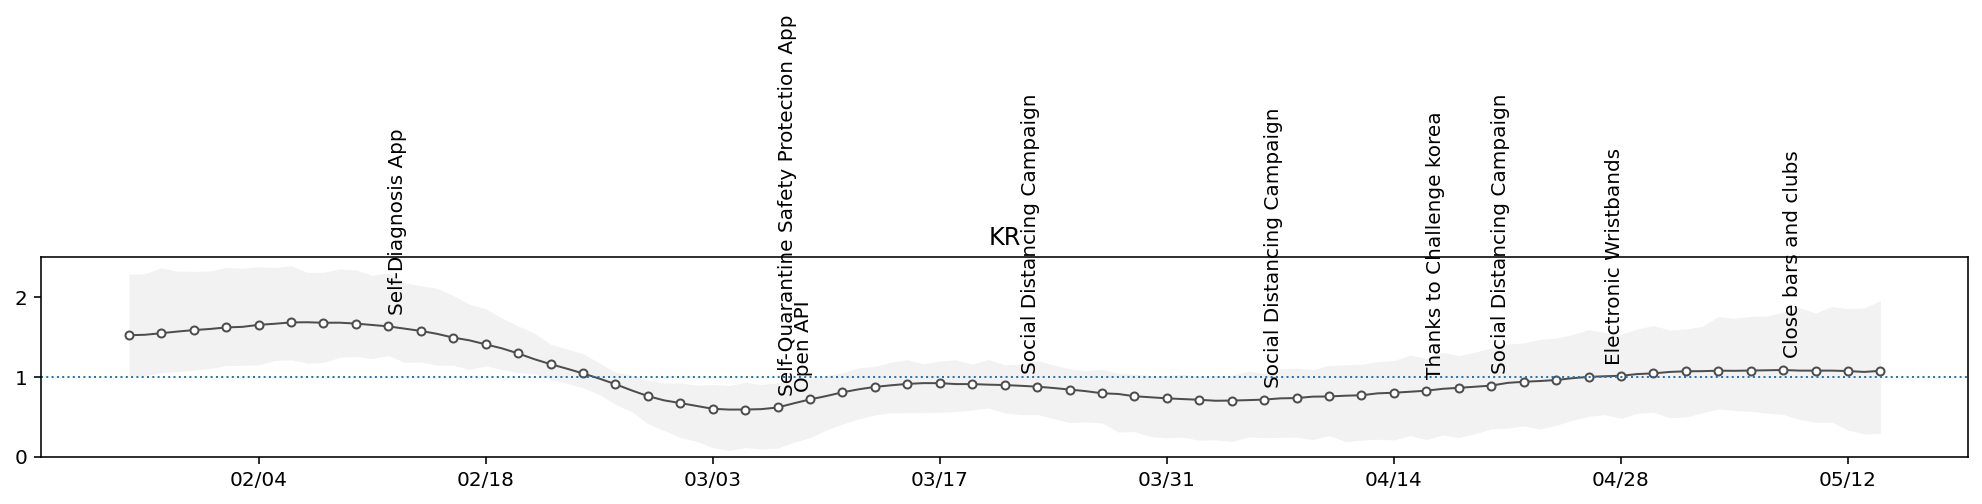

In [6]:
ncols = 1
nrows = int(np.ceil(results.index.levels[0].shape[0] / ncols))

fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(14, nrows*3),
    sharey='row')

# Uncomment for subplots
# for ax, (region, result) in zip(axes.flat, results.groupby('region')):
#     plot_rt(region, result.droplevel(0), ax)

for ax, (region, result) in zip([axes], results.groupby('region')):
    plot_rt(region, result.droplevel(0), ax)

fig.tight_layout()
fig.set_facecolor('w')